User wants to know if content rating affects how many installs there are per category
Look over each content rating and number of installs.
Determine which content rating has the highest number of installs and how many categories it belongs to. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


data = pd.read_csv("googleplaystoremaster.csv")

In [2]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

for this user story we need installs and rating to both be numerical. We also need category but no other column details. 

In [4]:
# Cleaning the Installs column
data = data[data.Installs != 'Free']

In [5]:
data['Installs'] = data['Installs'].str.replace('+', '')
data['Installs'] = data['Installs'].str.replace(',', '')
data.Installs=pd.to_numeric(data.Installs)

In [6]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
# removing variables from the dataframe that are not needed
df = data.drop(columns=['App', 'Reviews', 'Size', 'Type', 'Price', 'Rating',
                        'Genres', 'Last Updated', 'Current Ver', 'Android Ver'])

In [8]:
df.head()

,Category,Installs,Content Rating
0,ART_AND_DESIGN,10000,Everyone
1,ART_AND_DESIGN,500000,Everyone
2,ART_AND_DESIGN,5000000,Everyone
3,ART_AND_DESIGN,50000000,Teen
4,ART_AND_DESIGN,100000,Everyone


In [9]:
df.dtypes

Category          object
Installs           int64
Content Rating    object
dtype: object

In [10]:
df['Installs'].isna().sum()

0

In [11]:
df=df.groupby(['Content Rating', 'Category'])['Installs'].sum().reset_index()

In [12]:
df['Installs'].max()

30132549591

In [13]:
df['Installs'].min()

5

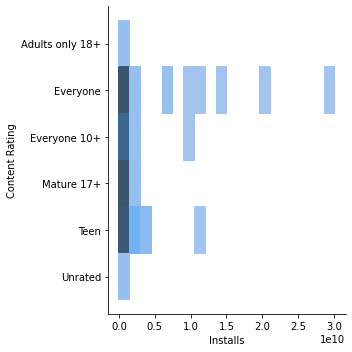

In [14]:
sns.displot(df,x ='Installs',y='Content Rating', bins = 20,)

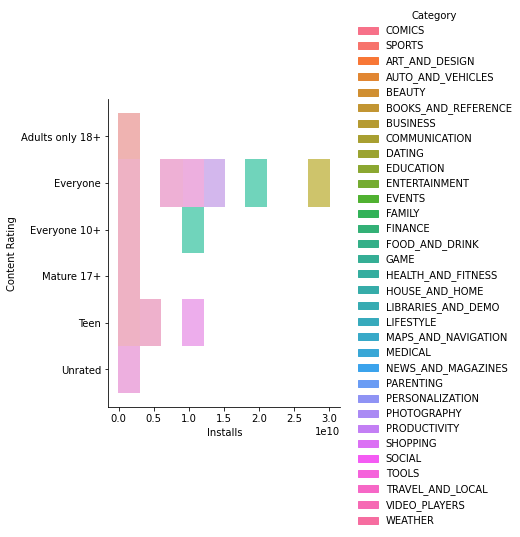

In [15]:
sns.displot(df,x ='Installs',y='Content Rating', hue= 'Category', bins = 10,)

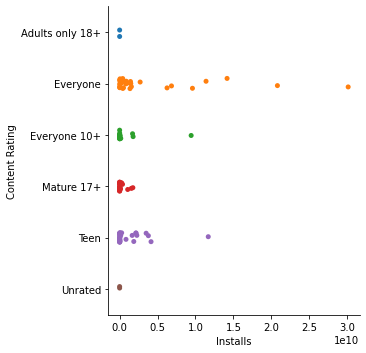

In [16]:
sns.catplot(x='Installs', y='Content Rating', data=df)

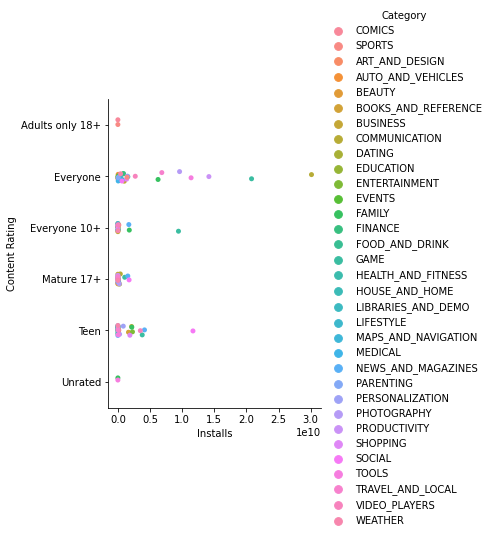

In [17]:
sns.catplot(x='Installs', y='Content Rating', hue='Category', data=df)

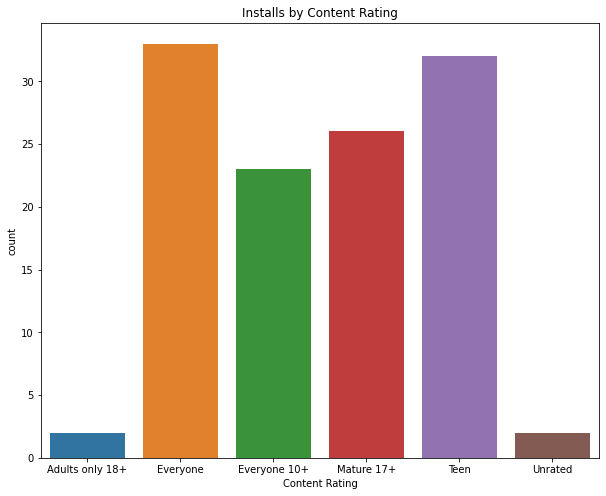

In [18]:
fig = plt.figure(figsize = (10,8))
plt.tight_layout()
plt.title('Installs by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Installs')
sns.countplot(x ='Content Rating', data = df)
plt.show()

In [19]:
df=df.rename(columns={'Content Rating': 'Content_Rating'})

In [20]:
df_everyone = df[df.Content_Rating == 'Everyone']

In [21]:
df_everyone['Category'].count()

33

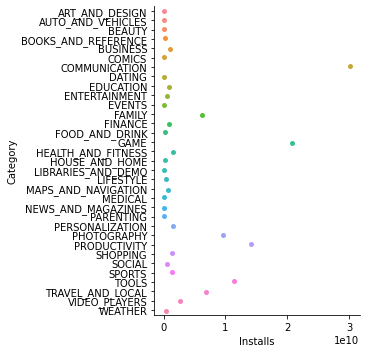

In [22]:
sns.catplot(x='Installs', y='Category', data=df_everyone)